In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.duplicated().sum()  #No duplicate columns exist

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df['Cabin'].count()/len(df)*100

np.float64(22.895622895622896)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Handling Missing Value

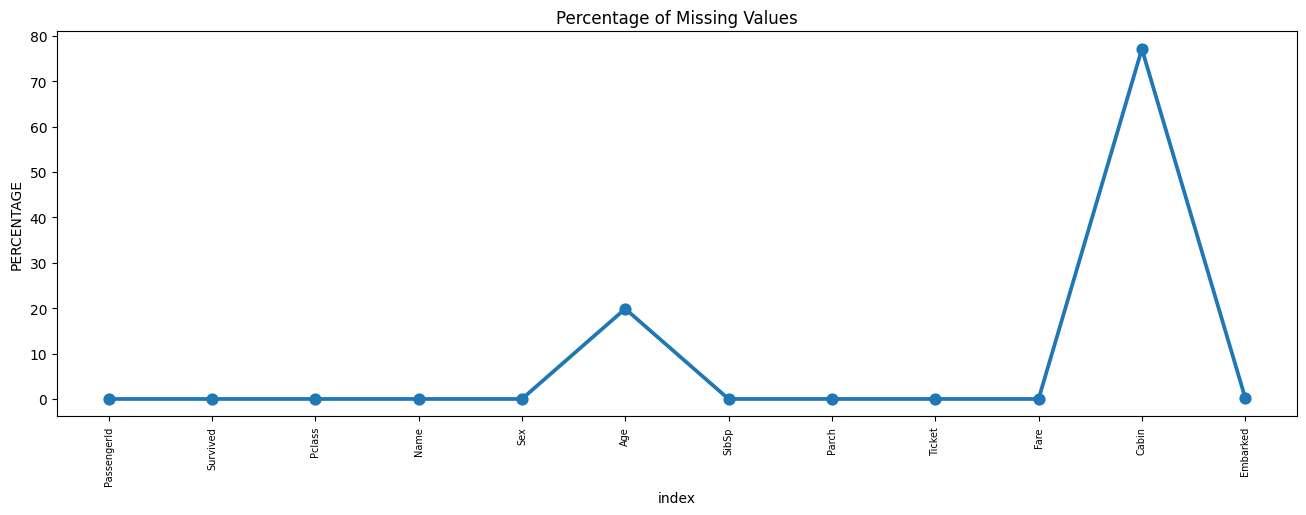

In [10]:
missing= pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot(data=missing, x='index', y=0)
plt.xticks(rotation= 90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df.drop('PassengerId',axis=1,inplace=True)

In [13]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

/tmp/ipython-input-1444409324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace= True)


In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

/tmp/ipython-input-4228943529.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)


In [15]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


##Some basic analysis

In [16]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [17]:
df.Survived.value_counts()/len(df)*100

,count
Survived,
0,61.616162
1,38.383838


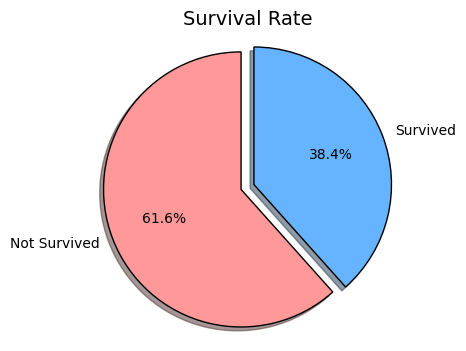

In [18]:
survival_counts = df['Survived'].value_counts()
plt.figure(figsize=(4, 4)) # Increased figure size
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=(0.1, 0), shadow=True, wedgeprops={'edgecolor': 'black'}) # Added explode, shadow, and wedgeprops for styling
plt.title('Survival Rate', fontsize=14) # Increased title font size
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

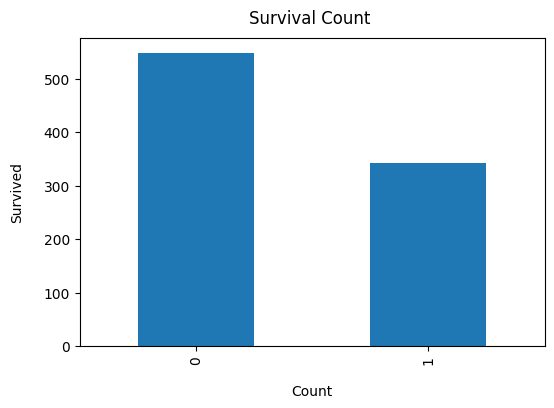

In [19]:
df['Survived'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Survived', labelpad=14)
plt.title('Survival Count ', y=1.02);

In [20]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


#Univarient Analysis

In [21]:
new_df= df.copy()

In [22]:
print(new_df['Age'].min())
print(new_df['Age'].max())

0.42
80.0


In [23]:
print(new_df['Fare'].min())
print(new_df['Fare'].max())

0.0
512.3292


In [24]:
labels=["{0} - {1}".format(i, i+11) for i in range(0, 80, 12)]
new_df['new_age']=pd.cut(new_df.Age, range(0,90,12), right=False, labels=labels)

In [25]:
new_df['new_fare'] = pd.qcut(new_df['Fare'], 13)

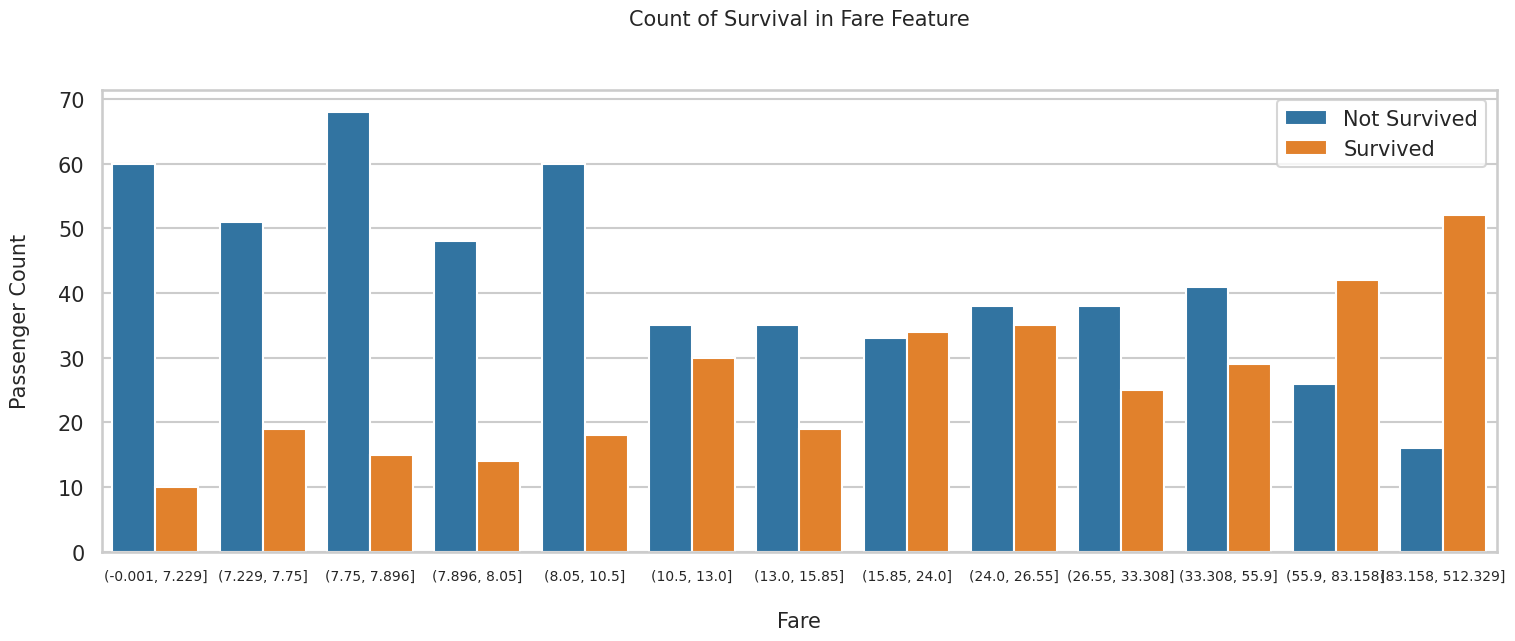

In [80]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.countplot(x='new_fare', hue='Survived', data=new_df)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [27]:
new_df['FamilySize'] = new_df['SibSp'] + new_df['Parch'] + 1

In [28]:
new_df['Cfamily']=new_df['FamilySize'].apply(lambda x: 1 if x<5 else 0)

/tmp/ipython-input-3899069288.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='Cfamily', y='Survived',palette='pastel', errorbar=None)


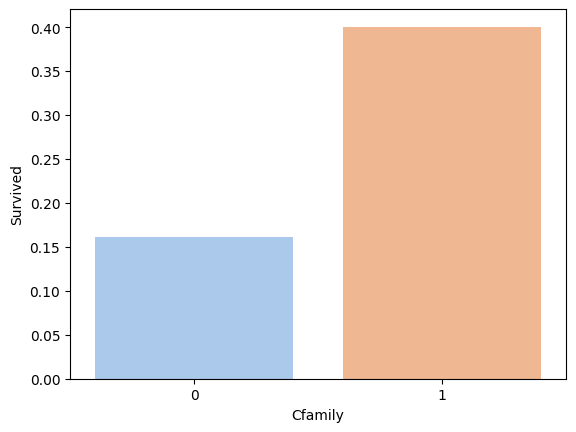

In [29]:
sns.barplot(data=new_df, x='Cfamily', y='Survived',palette='pastel', errorbar=None)
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

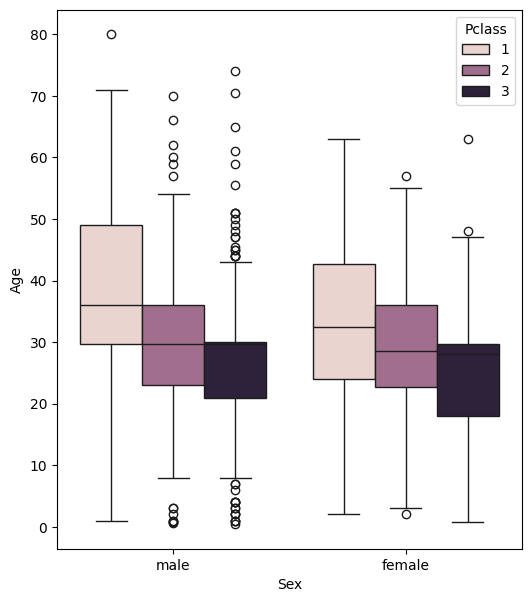

In [30]:
plt.figure(figsize=(6,7))
sns.boxplot(data=new_df, x='Sex', y='Age', hue='Pclass')

<Axes: xlabel='FamilySize', ylabel='Age'>

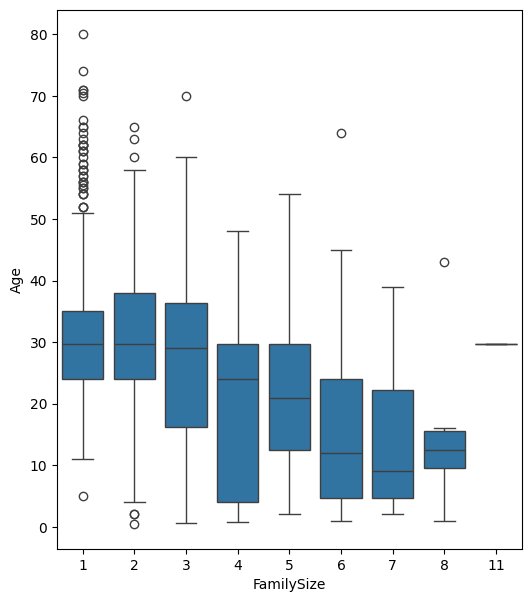

In [31]:
plt.figure(figsize=(6,7))
sns.boxplot(data=new_df, x='FamilySize', y='Age')

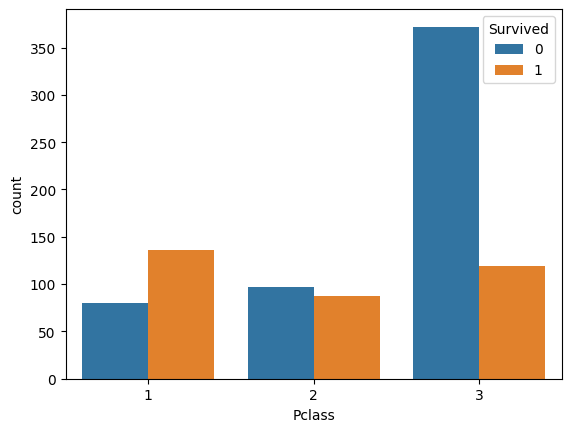

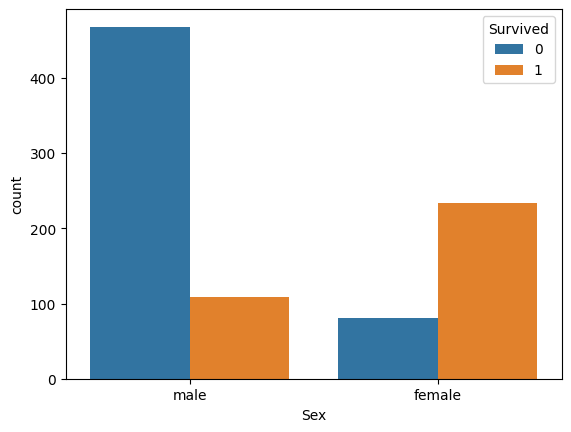

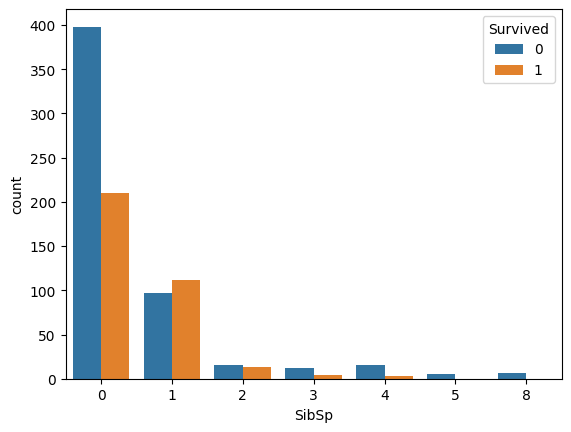

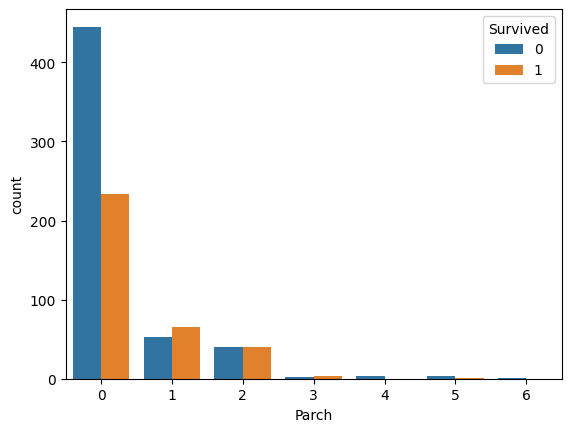

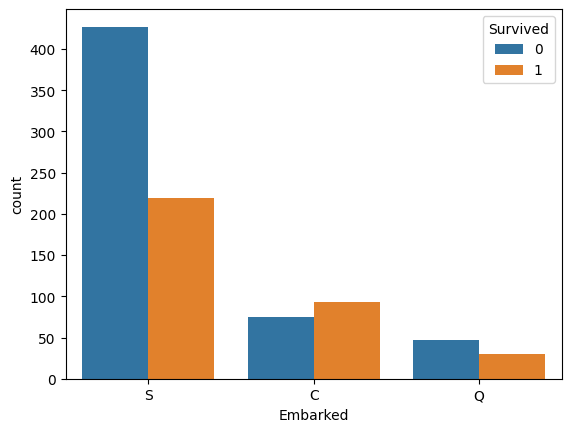

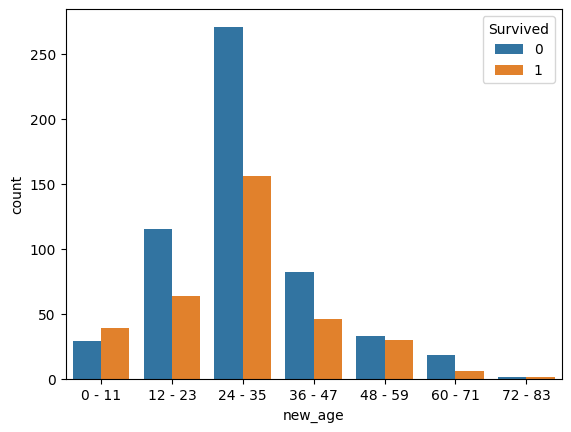

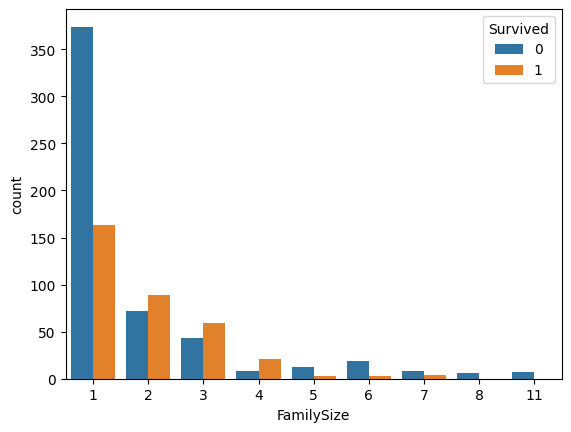

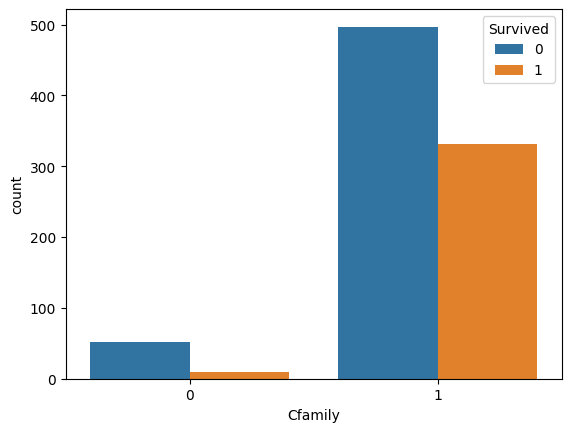

In [32]:
for i, features in enumerate(new_df.drop(columns=['Survived','Name', 'Ticket', 'Age', 'Fare','new_fare'])) :
  plt.figure(i)
  sns.countplot(data=new_df, x=features, hue='Survived')

In [33]:
e=new_df.groupby('Embarked')['Survived'].sum()
f=new_df.Embarked.value_counts()
g= e/f*100
print(g)

Embarked
C    55.357143
Q    38.961039
S    33.900929
dtype: float64


In [34]:
e=new_df.groupby('FamilySize')['Survived'].sum()
f=new_df.groupby('FamilySize')['Survived'].count()
g= e/f*100
print(g)

FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


In [35]:
new_df.FamilySize.value_counts()

,count
FamilySize,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [36]:
e=new_df.groupby('new_age')['Survived'].sum()
f=new_df.new_age.value_counts()
g= e/f*100
print(g)

new_age
0 - 11     57.352941
12 - 23    35.754190
24 - 35    36.533958
36 - 47    35.937500
48 - 59    47.619048
60 - 71    25.000000
72 - 83    50.000000
dtype: float64


/tmp/ipython-input-2640452123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  e=new_df.groupby('new_age')['Survived'].sum()


In [37]:
e=new_df.groupby('new_fare')['Survived'].sum()
f=new_df.new_fare.value_counts()
g= e/f*100
print(g)

new_fare
(-0.001, 7.229]      14.285714
(7.229, 7.75]        27.142857
(7.75, 7.896]        18.072289
(7.896, 8.05]        22.580645
(8.05, 10.5]         23.076923
(10.5, 13.0]         46.153846
(13.0, 15.85]        35.185185
(15.85, 24.0]        50.746269
(24.0, 26.55]        47.945205
(26.55, 33.308]      39.682540
(33.308, 55.9]       41.428571
(55.9, 83.158]       61.764706
(83.158, 512.329]    76.470588
dtype: float64


/tmp/ipython-input-848240283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  e=new_df.groupby('new_fare')['Survived'].sum()


In [38]:
new_df['Age'].idxmin()

803

In [39]:
new_df.loc[803]

,803
Survived,1
Pclass,3
Name,"Thomas, Master. Assad Alexander"
Sex,male
Age,0.42
SibSp,0
Parch,1
Ticket,2625
Fare,8.5167
Embarked,C


In [40]:
new_df['Fare'].idxmax()

258

In [41]:
new_df.iloc[179]

,179
Survived,0
Pclass,3
Name,"Leonard, Mr. Lionel"
Sex,male
Age,36.0
SibSp,0
Parch,0
Ticket,LINE
Fare,0.0
Embarked,S


In [42]:
new_df[new_df['Fare']>263]
#c.Sex.value_counts()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,new_age,new_fare,FamilySize,Cfamily
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,24 - 35,"(83.158, 512.329]",1,1
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36 - 47,"(83.158, 512.329]",2,1
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,24 - 35,"(83.158, 512.329]",1,1


In [43]:
c=new_df[new_df['Pclass']==1]

In [44]:
c.Pclass.value_counts()

,count
Pclass,
1,216


In [45]:
c.groupby('Sex')['Survived'].sum()

,Survived
Sex,
female,91
male,45


In [46]:
d=new_df[new_df['Pclass']==3]

In [47]:
d.groupby('Sex')['Survived'].sum()

,Survived
Sex,
female,72
male,47


#Numerical Analysis

In [48]:
new_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,new_age,new_fare,FamilySize,Cfamily
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,12 - 23,"(7.229, 7.75]",2,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,36 - 47,"(55.9, 83.158]",2,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,24 - 35,"(7.896, 8.05]",1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,24 - 35,"(33.308, 55.9]",2,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,24 - 35,"(7.896, 8.05]",1,1
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,24 - 35,"(8.05, 10.5]",1,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,48 - 59,"(33.308, 55.9]",1,1


In [49]:
new_df_dummies= pd.get_dummies(new_df.drop(columns=['Name', 'Ticket', 'new_fare']))
new_df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Cfamily,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,new_age_0 - 11,new_age_12 - 23,new_age_24 - 35,new_age_36 - 47,new_age_48 - 59,new_age_60 - 71,new_age_72 - 83
0,0,3,22.0,1,0,7.2500,2,1,False,True,False,False,True,False,True,False,False,False,False,False
1,1,1,38.0,1,0,71.2833,2,1,True,False,True,False,False,False,False,False,True,False,False,False
2,1,3,26.0,0,0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False,False,False
3,1,1,35.0,1,0,53.1000,2,1,True,False,False,False,True,False,False,True,False,False,False,False
4,0,3,35.0,0,0,8.0500,1,1,False,True,False,False,True,False,False,True,False,False,False,False


In [50]:
new_df_dummies.shape

(891, 20)

In [51]:
new_df.shape

(891, 14)

<Axes: >

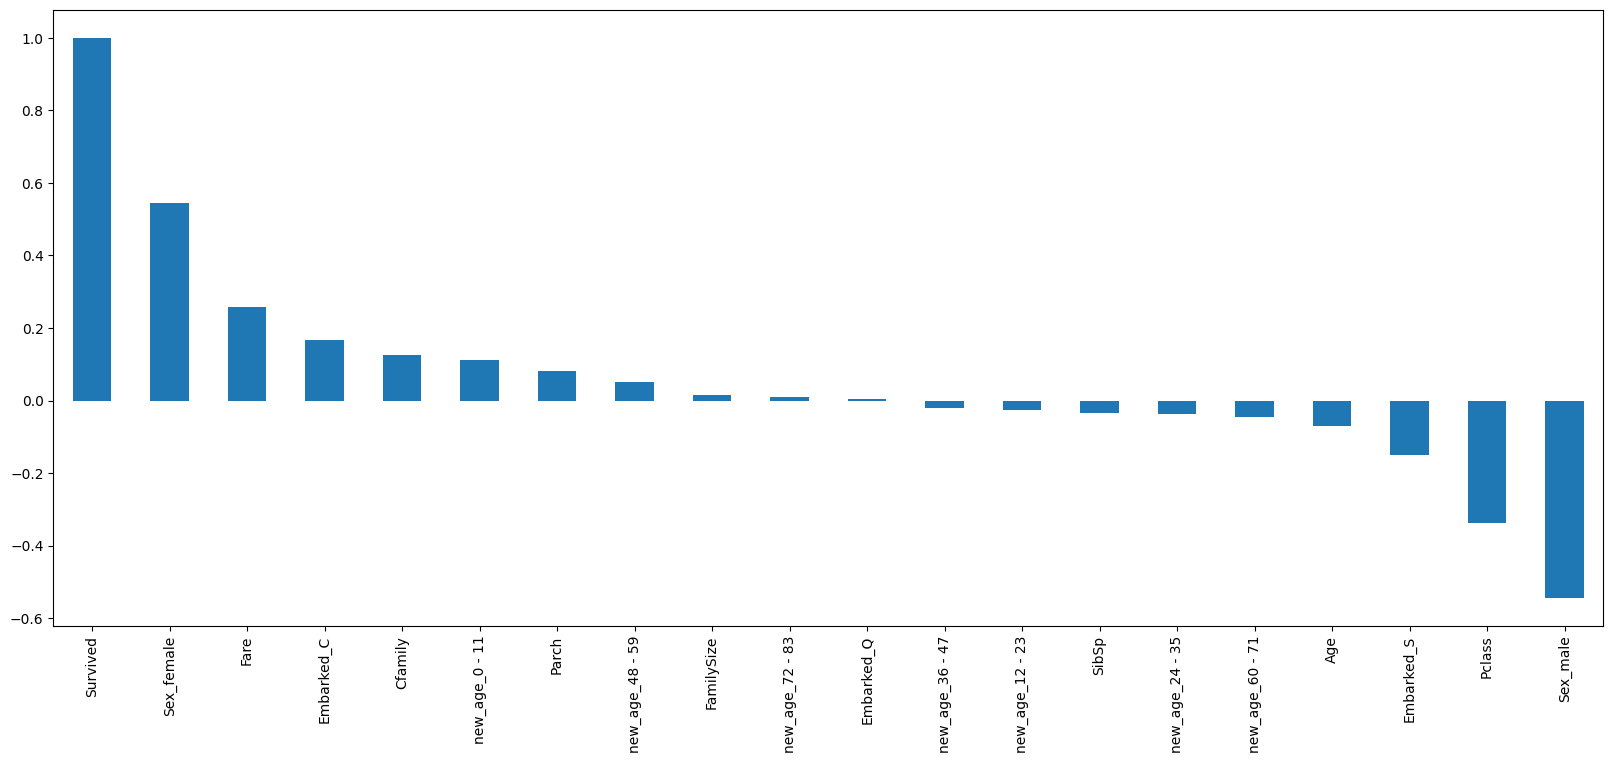

In [52]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Survived'].sort_values(ascending= False).plot(kind= 'bar')

<Axes: >

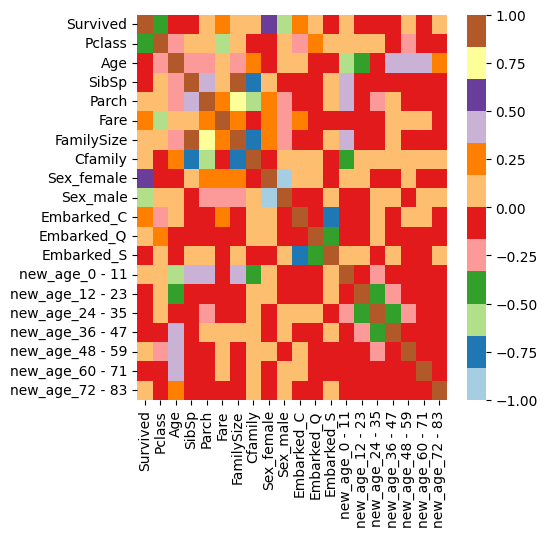

In [53]:
plt.figure(figsize= (5,5))
sns.heatmap(new_df_dummies.corr(), cmap= 'Paired')

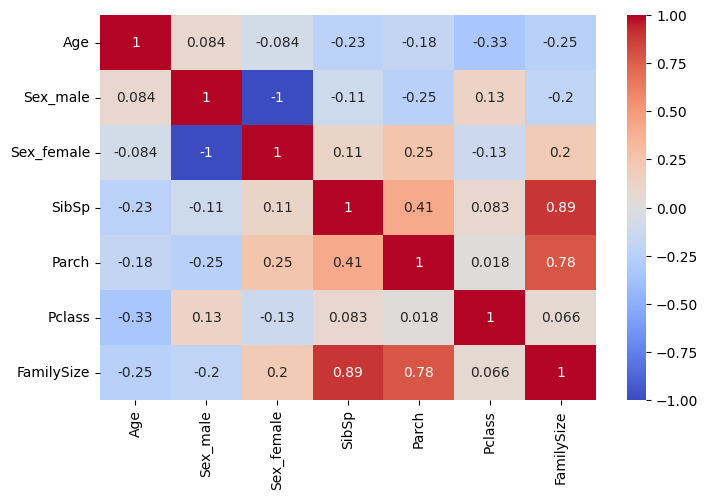

In [54]:
plt.figure(figsize= (8,5))
sns.heatmap(new_df_dummies[["Age","Sex_male","Sex_female","SibSp","Parch","Pclass", "FamilySize"]].corr(), annot = True, cmap= 'coolwarm')
plt.show()

#Bivarient Analysis

In [55]:
new_df1_target0= new_df.loc[new_df['Survived']==0]
new_df1_target1= new_df.loc[new_df['Survived']==1]

In [56]:
len(new_df1_target0)

549

In [57]:
new_df1_target1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,new_age,new_fare,FamilySize,Cfamily
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,36 - 47,"(55.9, 83.158]",2,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,24 - 35,"(7.896, 8.05]",1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,24 - 35,"(33.308, 55.9]",2,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,24 - 35,"(10.5, 13.0]",3,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,12 - 23,"(26.55, 33.308]",2,1


In [58]:
new_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,new_age,new_fare,FamilySize,Cfamily
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,12 - 23,"(7.229, 7.75]",2,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,36 - 47,"(55.9, 83.158]",2,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,24 - 35,"(7.896, 8.05]",1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,24 - 35,"(33.308, 55.9]",2,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,24 - 35,"(7.896, 8.05]",1,1


In [59]:
import matplotlib.ticker as mtick

In [60]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    # Reduce the figure size by half
    fig.set_size_inches(width/2 , 4)
    plt.xticks(rotation=45)
    # plt.yscale('log') # Remove the log scale
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    # Set y-axis formatter to scientific notation
    formatter = mtick.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(formatter)

    # Make the legend smaller
    plt.legend(title=hue, loc='upper right', fontsize=10)


    plt.show()

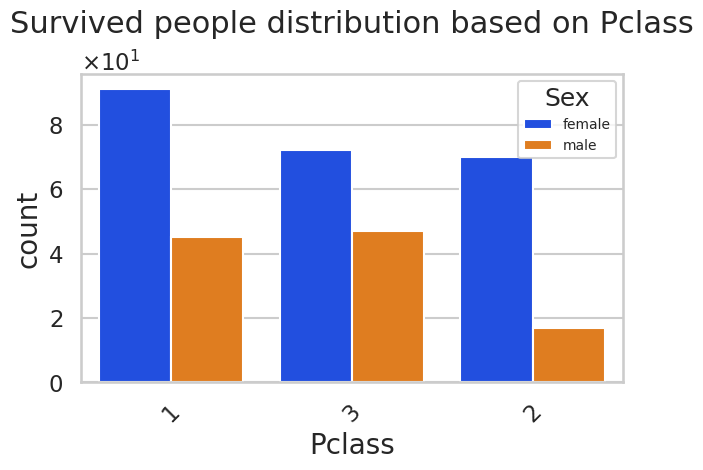

In [61]:
uniplot(new_df1_target1,col='Pclass',title='Survived people distribution based on Pclass',hue='Sex')

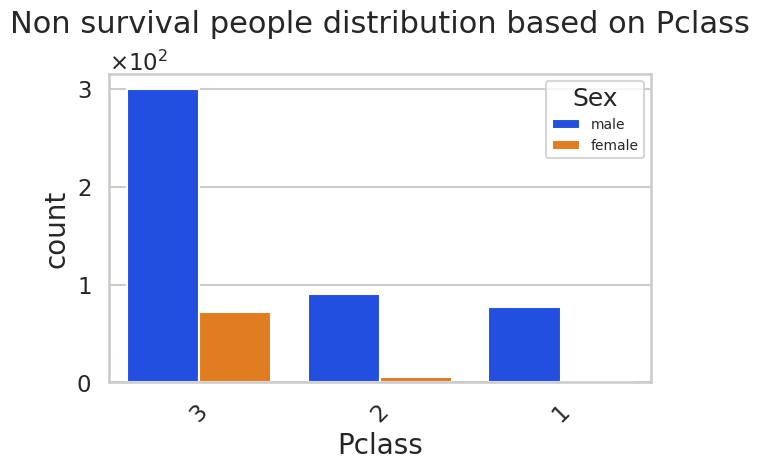

In [62]:
uniplot(new_df1_target0,col='Pclass',title='Non survival people distribution based on Pclass',hue='Sex')

In [63]:
c=new_df[(new_df['Pclass']==1) & (new_df['Sex']=='female')]
c[c['Survived']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,new_age,new_fare,FamilySize,Cfamily
177,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C,48 - 59,"(26.55, 33.308]",1,1
297,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S,0 - 11,"(83.158, 512.329]",4,1
498,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S,24 - 35,"(83.158, 512.329]",4,1


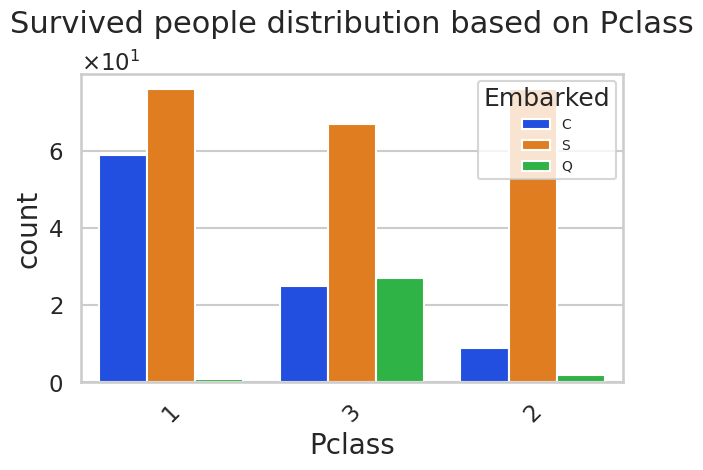

In [64]:
uniplot(new_df1_target1,col='Pclass',title='Survived people distribution based on Pclass',hue='Embarked')

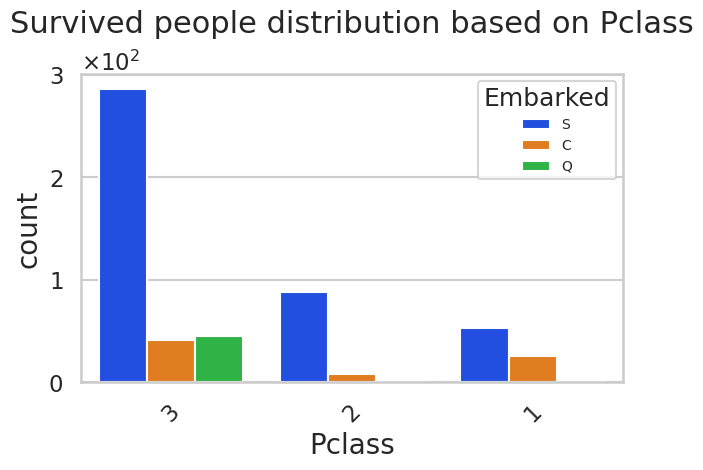

In [65]:
uniplot(new_df1_target0,col='Pclass',title='Survived people distribution based on Pclass',hue='Embarked')

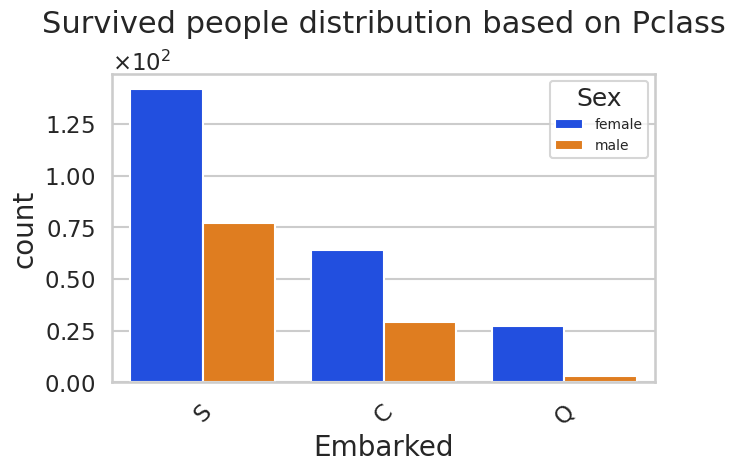

In [66]:
uniplot(new_df1_target1,col='Embarked',title='Survived people distribution based on Pclass',hue='Sex')

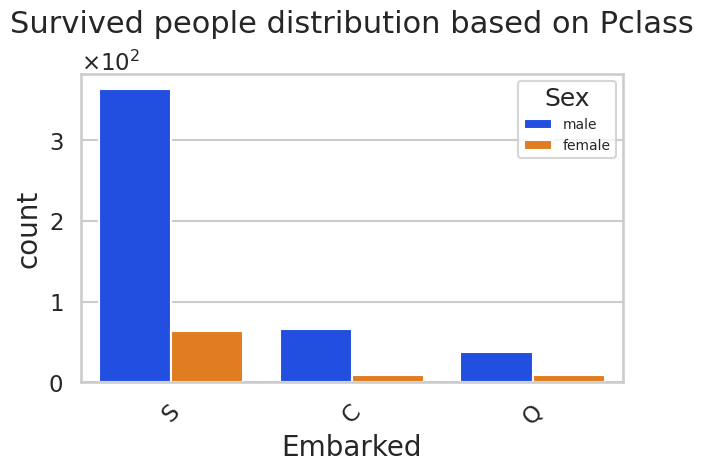

In [67]:
uniplot(new_df1_target0,col='Embarked',title='Survived people distribution based on Pclass',hue='Sex')

In [68]:
new_df.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'new_age', 'new_fare', 'FamilySize', 'Cfamily'],
      dtype='object')

In [69]:
new_df.groupby('new_age')['Survived'].sum()

/tmp/ipython-input-635757189.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df.groupby('new_age')['Survived'].sum()


,Survived
new_age,
0 - 11,39
12 - 23,64
24 - 35,156
36 - 47,46
48 - 59,30
60 - 71,6
72 - 83,1


In [70]:
new_df.groupby('new_age')['Survived'].count()

/tmp/ipython-input-2895950661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df.groupby('new_age')['Survived'].count()


,Survived
new_age,
0 - 11,68
12 - 23,179
24 - 35,427
36 - 47,128
48 - 59,63
60 - 71,24
72 - 83,2


In [71]:
new_df.groupby('Pclass')['Survived'].count()

,Survived
Pclass,
1,216
2,184
3,491


In [72]:
new_df['Title'] = new_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
new_df.Title.head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [73]:
new_df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [74]:
new_df.groupby('Title')['Survived'].sum()

,Survived
Title,
Capt,0
Col,1
Countess,1
Don,0
Dr,3
Jonkheer,0
Lady,1
Major,1
Master,23


/tmp/ipython-input-3642109654.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Title', palette='pastel', legend=False)


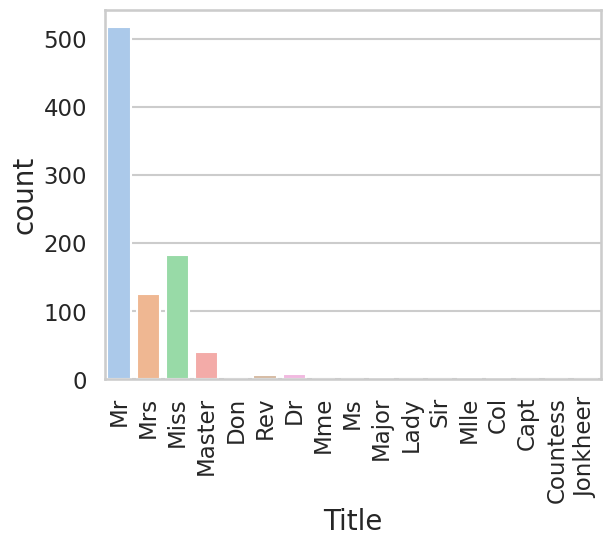

In [75]:
sns.countplot(data=new_df, x='Title', palette='pastel', legend=False)
plt.xticks(rotation=90)
plt.show()

Master=0
Miss, Ms, Mlle=1
Mr=2
Others=3

In [76]:
# convert to categorical
new_df["Title"] = new_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
new_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in new_df["Title"]]
new_df["Title"].head(20)


,Title
0,2
1,1
2,1
3,1
4,2
5,2
6,2
7,0
8,1
9,1


/tmp/ipython-input-1734096026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Title', palette='pastel', legend=False)


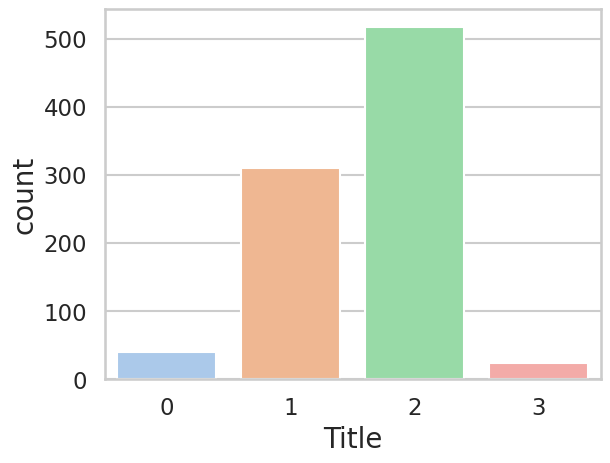

In [77]:
sns.countplot(data=new_df, x='Title', palette='pastel', legend=False)
plt.show()

In [78]:
new_df.groupby('Title')['Survived'].sum()

,Survived
Title,
0,23
1,229
2,81
3,9


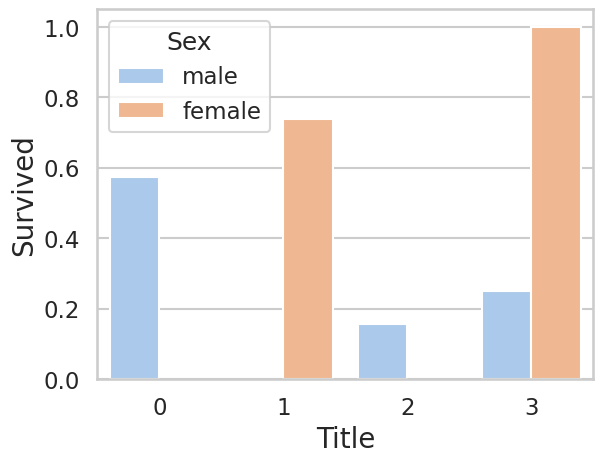

In [79]:
sns.barplot(data=new_df, x='Title', y='Survived',palette='pastel', hue='Sex' ,errorbar=None)
plt.show()